<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

# Part 2 of 4

# Contents: 
Part 1: Data Collection 

- Webscrapping Subreddit Tea

- Webscrapping Subreddit Coffee

- Summary

Part 2: EDA and Data Cleaning

-[Tea](#Tea)

-[Coffee](#Coffee)

-[Initial Identification of Top Words](#Top_Words)

-[Compare Lemmatization and Stemming](#Compare)

-[Summary](#Summary2)

Part 3: Modelling and Model Evaluation

Part 4: Sentiment Analysis, Recommendation and Conclusion

# EDA and Data Cleaning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, RegexpTokenizer


sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
# import csv
tea_df = pd.read_csv('./data/tea.csv')
coffee_df = pd.read_csv('./data/coffee.csv')

C:\Users\jyeni\AppData\Local\Temp\ipykernel_17176\2392337752.py:2: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  tea_df = pd.read_csv('./data/tea.csv')


<a id="Tea"></a>
## Tea

In [3]:
tea_select_df = tea_df[['subreddit', 'selftext', 'title', 'removed_by_category', 'author']]
print(tea_select_df.shape)
tea_select_df.head()

(14971, 5)


,subreddit,selftext,title,removed_by_category,author
0,tea,"My lovely wife has been drinking Sloane ""Heave...",Can someone recommend a tea for me?,NaN,psydchicjohn
1,tea,I took a look at the vendors list but none of ...,Buying Chamomile in US,NaN,piecesofagrippa
2,tea,NaN,Is this a good introduction to kamairicha?,NaN,SamGoldfield
3,tea,I noticed that pretty much everybody selling C...,I was curious about the story on Colombian bla...,NaN,yddandy
4,tea,[removed],"Sencha, Gyokuro, metals, etc.",automod_filtered,BigBart123


In [4]:
# Check for duplicates
tea_select_df.loc[tea_select_df.duplicated(),:]

,subreddit,selftext,title,removed_by_category,author
287,tea,I wanted to try and see if I could replicate t...,Best non-dairy creamer for milk tea?,NaN,cherryxbeau
288,tea,I wanted to try and see if I could replicate t...,Best non-dairy creamer for milk tea?,NaN,cherryxbeau
510,tea,NaN,Pineapple is considered a superfood because of...,automod_filtered,RealisticChard6
698,tea,NaN,My introduction to Pu-Erh. I’m hooked and pati...,NaN,Bewgnish
778,tea,NaN,Pineapple is considered a superfood because of...,automod_filtered,RealisticChard6
...,...,...,...,...,...
14853,tea,NaN,"Bought it a while ago but threw the package, c...",NaN,GabenFixPls
14896,tea,NaN,Interesting Cup !,NaN,ymbuffety
14897,tea,NaN,Interesting Cup !,NaN,ymbuffety
14898,tea,NaN,Interesting Cup !,NaN,ymbuffety


In [5]:
# Drop duplicates
tea_select_df.drop_duplicates(subset=['title'],keep='first', inplace=True)

C:\Users\jyeni\AppData\Local\Temp\ipykernel_17176\948481270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tea_select_df.drop_duplicates(subset=['title'],keep='first', inplace=True)


In [6]:
# There are still many duplicate posts by author 'AutoModerator'
tea_select_df.loc[tea_select_df['author'] == 'AutoModerator',:]

,subreddit,selftext,title,removed_by_category,author
18,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator
86,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator
116,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator
151,tea,We realize there are lots of people involved i...,"Marketing Monday! - September 26, 2022",NaN,AutoModerator
154,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator
...,...,...,...,...,...
14854,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator
14893,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator
14921,tea,We realize there are lots of people involved i...,"Marketing Monday! - August 23, 2021",NaN,AutoModerator
14922,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",NaN,AutoModerator


In [7]:
tea_select_df=tea_select_df.loc[~(tea_select_df['author']=='AutoModerator'),:]

In [8]:
tea_select_df.shape

(14102, 5)

In [9]:
# remove posts where 'removed_by_category' is not NaN as these posts have been filtered out automatically by Reddit
tea_select_df = tea_select_df.loc[tea_select_df['removed_by_category'].isnull(), :]

# drop 'removed_by_category' after it has been filtered
tea_select_df = tea_select_df[['subreddit', 'selftext', 'title']]

In [10]:
print(tea_select_df.shape)
tea_select_df.head()

(11673, 3)


,subreddit,selftext,title
0,tea,"My lovely wife has been drinking Sloane ""Heave...",Can someone recommend a tea for me?
1,tea,I took a look at the vendors list but none of ...,Buying Chamomile in US
2,tea,NaN,Is this a good introduction to kamairicha?
3,tea,I noticed that pretty much everybody selling C...,I was curious about the story on Colombian bla...
6,tea,NaN,Haul! Any suggestions on how to brew these teas?


In [11]:
tea_select_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11673 entries, 0 to 14970
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  11673 non-null  object
 1   selftext   5177 non-null   object
 2   title      11673 non-null  object
dtypes: object(3)
memory usage: 364.8+ KB


In [12]:
# Fillna with '-' so that it does not appear as string NaN afterwards
tea_select_df['selftext'].fillna('-', inplace=True)

In [13]:
# combine texts in selftext with title
tea_select_df['title'] = tea_select_df['title'] + ' ' + tea_select_df['selftext'].astype(str)
# drop selftext column
tea_select_df = tea_select_df[['subreddit', 'title']]

In [14]:
print(tea_select_df.shape)
tea_select_df.head()

(11673, 2)


,subreddit,title
0,tea,Can someone recommend a tea for me? My lovely ...
1,tea,Buying Chamomile in US I took a look at the ve...
2,tea,Is this a good introduction to kamairicha? -
3,tea,I was curious about the story on Colombian bla...
6,tea,Haul! Any suggestions on how to brew these tea...


In [15]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
tea_select_df['title']=tea_select_df['title'].apply(lambda x:expand_contractions(x))

In [16]:
# apply lowercase to all text in title
tea_select_df['title']=tea_select_df['title'].apply(lambda x: x.lower())

In [17]:
print(tea_select_df.shape)
tea_select_df.head()

(11673, 2)


,subreddit,title
0,tea,can someone recommend a tea for me? my lovely ...
1,tea,buying chamomile in us i took a look at the ve...
2,tea,is this a good introduction to kamairicha? -
3,tea,i was curious about the story on colombian bla...
6,tea,haul! any suggestions on how to brew these tea...


Tea dataset

There were 156 rows of duplicates in the dataset and 453 posts by author 'Automoderator'. These were dropped as they would not be useful as training data. We also removed posts where 'removed_by_category' is not NaN as these posts have been filtered out automatically by Reddit. Subsequently, 'selftext' which is the description of the Reddit post is combined with the 'title' so that we have a more comprehensive title. 

<a id="Coffee"></a>
## Coffee

In [18]:
coffee_select_df = coffee_df[['subreddit', 'selftext', 'title', 'removed_by_category','author']]
print(coffee_select_df.shape)
coffee_select_df.head()

(14979, 5)


,subreddit,selftext,title,removed_by_category,author
0,Coffee,NaN,Coffee reduces cardiovascular disease - large ...,NaN,_FormerFarmer
1,Coffee,NaN,"Where do Europeans get their coffee, Stareuros?",NaN,Geegoriel9
2,Coffee,12oz Black coffee (cold brew or hot)\n\n8oz ST...,Dark and Stormy Coffee; why am I just learning...,NaN,TheRealOsamaru
3,Coffee,Since having quality freshly roasted beans is ...,Should I learn how to roast coffee beans befor...,NaN,Complex_Secretary_14
4,Coffee,NaN,Roast me!,NaN,deemonstalker


In [19]:
# Check for duplicates
coffee_select_df.loc[coffee_select_df.duplicated(),:]

,subreddit,selftext,title,removed_by_category,author
5,Coffee,NaN,Roast me!,NaN,deemonstalker
6,Coffee,NaN,"Where do Europeans get their coffee, Stareuros?",NaN,Geegoriel9
86,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,NaN,menschmaschine5
151,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,NaN,menschmaschine5
201,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,NaN,menschmaschine5
...,...,...,...,...,...
14730,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,NaN,menschmaschine5
14799,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,NaN,menschmaschine5
14876,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,NaN,menschmaschine5
14890,Coffee,Welcome to the /r/Coffee deal and promotional ...,[MOD] The Official Deal Thread,NaN,menschmaschine5


In [20]:
# Drop duplicates
coffee_select_df.drop_duplicates(subset=['title'],keep='first', inplace=True)

C:\Users\jyeni\AppData\Local\Temp\ipykernel_17176\14136497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_select_df.drop_duplicates(subset=['title'],keep='first', inplace=True)


In [21]:
coffee_select_df.loc[coffee_select_df.duplicated(),:]

,subreddit,selftext,title,removed_by_category,author


In [22]:
# No 'author' by the name of 'AutoModerator' like tea data
coffee_select_df.loc[coffee_select_df['author'] == 'AutoModerator',:]

,subreddit,selftext,title,removed_by_category,author


In [23]:
coffee_select_df.shape

(14285, 5)

In [24]:
# remove posts where 'removed_by_category' is not NaN as these posts have been filtered out automatically by Reddit
coffee_select_df = coffee_select_df.loc[coffee_select_df['removed_by_category'].isnull(), :]

# drop 'removed_by_category' after it has been filtered
coffee_select_df = coffee_select_df[['subreddit', 'selftext', 'title']]

In [25]:
print(coffee_select_df.shape)
coffee_select_df.head()

(13253, 3)


,subreddit,selftext,title
0,Coffee,NaN,Coffee reduces cardiovascular disease - large ...
1,Coffee,NaN,"Where do Europeans get their coffee, Stareuros?"
2,Coffee,12oz Black coffee (cold brew or hot)\n\n8oz ST...,Dark and Stormy Coffee; why am I just learning...
3,Coffee,Since having quality freshly roasted beans is ...,Should I learn how to roast coffee beans befor...
4,Coffee,NaN,Roast me!


In [26]:
coffee_select_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13253 entries, 0 to 14978
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  13253 non-null  object
 1   selftext   9297 non-null   object
 2   title      13253 non-null  object
dtypes: object(3)
memory usage: 414.2+ KB


In [27]:
# Fillna with '-' so that it does not appear as string NaN afterwards
coffee_select_df['selftext'].fillna('-', inplace=True)

In [28]:
# combine texts in selftext with title
coffee_select_df['title'] = coffee_select_df['title'] + ' ' + coffee_select_df['selftext'].astype(str)
# drop selftext column
coffee_select_df = coffee_select_df[['subreddit', 'title']]

In [29]:
# Expanding Contractions in the reviews
coffee_select_df['title']=coffee_select_df['title'].apply(lambda x:expand_contractions(x))

In [30]:
# apply lowercase to all text in title
coffee_select_df['title']=coffee_select_df['title'].apply(lambda x: x.lower())

In [31]:
print(coffee_select_df.shape)
coffee_select_df.head()

(13253, 2)


,subreddit,title
0,Coffee,coffee reduces cardiovascular disease - large ...
1,Coffee,"where do europeans get their coffee, stareuros? -"
2,Coffee,dark and stormy coffee; why am i just learning...
3,Coffee,should i learn how to roast coffee beans befor...
4,Coffee,roast me! -


Coffee dataset

There were 502 rows of duplicates in the dataset. These were dropped as they would not be useful as training data. We also removed posts where 'removed_by_category' is not NaN as these posts have been filtered out automatically by Reddit. Subsequently, 'selftext' which is the description of the Reddit post is combined with the 'title' so that we have a more comprehensive title. 

## Combine Dataset

In [32]:
print(tea_select_df.shape)
tea_select_df.head()

(11673, 2)


,subreddit,title
0,tea,can someone recommend a tea for me? my lovely ...
1,tea,buying chamomile in us i took a look at the ve...
2,tea,is this a good introduction to kamairicha? -
3,tea,i was curious about the story on colombian bla...
6,tea,haul! any suggestions on how to brew these tea...


In [33]:
print(coffee_select_df.shape)
coffee_select_df.head()

(13253, 2)


,subreddit,title
0,Coffee,coffee reduces cardiovascular disease - large ...
1,Coffee,"where do europeans get their coffee, stareuros? -"
2,Coffee,dark and stormy coffee; why am i just learning...
3,Coffee,should i learn how to roast coffee beans befor...
4,Coffee,roast me! -


In [34]:
df_combined = pd.concat([tea_select_df, coffee_select_df], ignore_index=True)
print(df_combined.shape)
df_combined.tail()

(24926, 2)


,subreddit,title
24921,Coffee,is store brand cold brew less acidic?! -
24922,Coffee,on yunnan coffee i was drinking a mix of yunna...
24923,Coffee,"what is an easy way to get strong, ""noteless"" ..."
24924,Coffee,how to make coffee less bitter hi i have been ...
24925,Coffee,used breville bes870xl - under $500 - any othe...


## Remove http links, new line, &amp, /r, punctuations

In [35]:
#removing links
df_combined['title'] = df_combined['title'].map(lambda x: re.sub(r"http\S+", '', x))
#removing &amp
df_combined['title'] = df_combined['title'].map(lambda x: x.replace('&amp;',''))
#removing /r
df_combined['title'] = df_combined['title'].map(lambda x: x.replace('r/',''))

# Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:
df_combined['title']=df_combined['title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [36]:
df_combined.head()

,subreddit,title
0,tea,can someone recommend a tea for me my lovely w...
1,tea,buying chamomile in us i took a look at the ve...
2,tea,is this a good introduction to kamairicha
3,tea,i was curious about the story on colombian bla...
4,tea,haul any suggestions on how to brew these teas


<a id="Top_Words"></a>
## Initial Identification of Top Words

To identify the top words or interesting words, CountVectorizer and TF-IDF Vectorizer were used for unigram, bigram and trigram. This process has been repeated a few times to filter out the words which are not stopwords but of little use in helping us identify the interesting words. Key labels such as 'tea' and 'coffee' were deliberately left in as they hold meaning in identifying the type of unique tea or coffee or other words of interest. 

Bigram and trigram returned interesting results that gave better insight to the popular topics discussed by the public. These words can then carry on into sentiment analysis in Part 4. 

In [37]:
dummylist = stopwords.words("english")

In [38]:
dummy_sw = ['im', 'ive', 'good', 'dont', 'does', 'question', 'maybe', 'did', 'doesnt', 'hi', 'people', 'id', 'recently', 'thanks', 'like', 'day', 'nice', 'thank', 'anyone', 'first', 'would', 'drinking', 'drink'] 
dummylist.extend(dummy_sw)

In [39]:
dummylist[-20:]

['dont',
 'does',
 'question',
 'maybe',
 'did',
 'doesnt',
 'hi',
 'people',
 'id',
 'recently',
 'thanks',
 'like',
 'day',
 'nice',
 'thank',
 'anyone',
 'first',
 'would',
 'drinking',
 'drink']

In [40]:
# df_combined.loc[df_combined['subreddit'] == 'tea', ['title']]['title']

In [41]:
tea_title = df_combined.loc[df_combined['subreddit'] == 'tea', ['title']]['title']

### Tea

#### CountVectorizer

In [42]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words=dummylist, min_df=0.01) # filter out words that appear in less than 1% of the documents

In [43]:
X_vec = cvec.fit_transform(tea_title)

In [44]:
X_df = pd.DataFrame(X_vec.toarray(), columns=cvec.get_feature_names())
print(X_df.shape)
X_df.head()

(11673, 334)


,10,able,actually,add,advance,advice,afternoon,ago,almost,already,...,work,world,worth,wrong,x200b,year,years,yet,yixing,yunnan
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_df.sum().sort_values(ascending=False)[:30]

tea                18566
teas                2458
green               1684
know                1623
water               1544
get                 1527
one                 1512
black               1464
really              1253
looking             1226
time                1210
new                 1144
make                1091
leaf                1065
taste               1058
want                1051
also                1026
cup                 1012
loose                983
love                 980
find                 957
tried                930
much                 915
got                  913
use                  895
help                 889
oolong               887
something            880
recommendations      829
leaves               826
dtype: int64

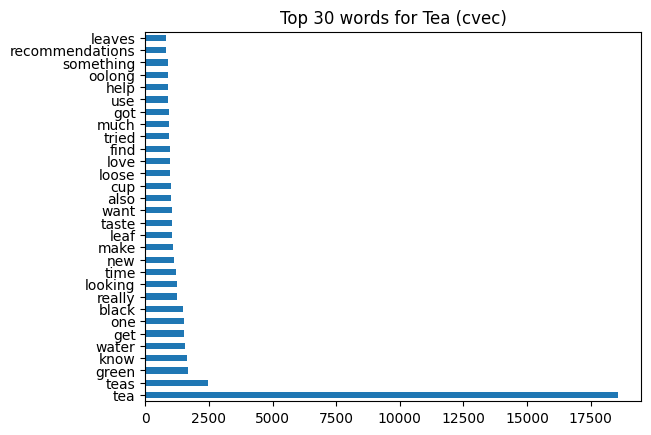

In [46]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea (cvec)');

#### TF-IDF Vectorizer 

In [47]:
tvec = TfidfVectorizer(stop_words = dummylist, min_df=0.01)

In [48]:
X_tvec = tvec.fit_transform(tea_title)

In [49]:
X_df = pd.DataFrame(X_tvec.todense(), columns=tvec.get_feature_names())
print(X_df.shape)
X_df.head()

(11673, 334)


,10,able,actually,add,advance,advice,afternoon,ago,almost,already,...,work,world,worth,wrong,x200b,year,years,yet,yixing,yunnan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305066,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_df.sum().sort_values(ascending=False)[:30]

tea        2007.467615
teas        337.894206
new         312.834663
green       310.419269
know        276.200208
black       256.248880
one         245.758448
oolong      235.354477
time        234.073497
get         232.788605
cup         232.182053
matcha      224.341870
teapot      218.148024
looking     216.650964
got         214.090656
help        209.232776
love        205.251264
water       203.277926
really      195.717732
leaf        193.600946
make        189.612952
best        185.004463
find        179.395811
set         176.787436
loose       173.694349
made        172.039726
tried       169.793403
want        168.900198
morning     167.467632
use         166.844838
dtype: float64

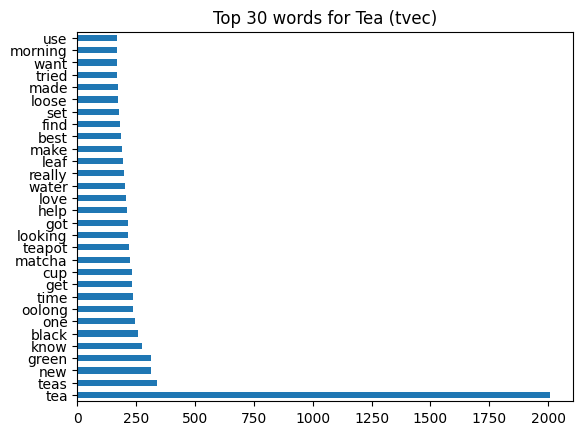

In [51]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea (tvec)');

#### Bi-gram
#### CountVectorizer

In [52]:
cvec_bi = CountVectorizer(stop_words=dummylist, ngram_range=(2,2), min_df=0.01) # filter out words that appear in less than 1% of the documents

In [53]:
X_vec = cvec_bi.fit_transform(tea_title)

In [54]:
X_vec

<11673x23 sparse matrix of type '<class 'numpy.int64'>'
	with 5454 stored elements in Compressed Sparse Row format>

In [55]:
X_df = pd.DataFrame(X_vec.todense(), columns=cvec_bi.get_feature_names())
print(X_df.shape)
X_df.head()

(11673, 23)


,black tea,black teas,boiling water,cup tea,earl grey,gong fu,green tea,green teas,hot water,iced tea,...,new tea,tea bag,tea bags,tea leaves,tea pot,tea set,tea shop,tea tea,white tea,yunnan sourcing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_df.sum().sort_values(ascending=False)[:30]

green tea          1152
black tea           874
loose leaf          790
earl grey           339
tea bags            327
leaf tea            318
white tea           309
new tea             303
tea set             260
tea leaves          257
gong fu             202
iced tea            202
hot water           189
make tea            182
yunnan sourcing     170
black teas          168
cup tea             167
tea pot             165
green teas          152
tea bag             148
tea shop            148
tea tea             147
boiling water       135
dtype: int64

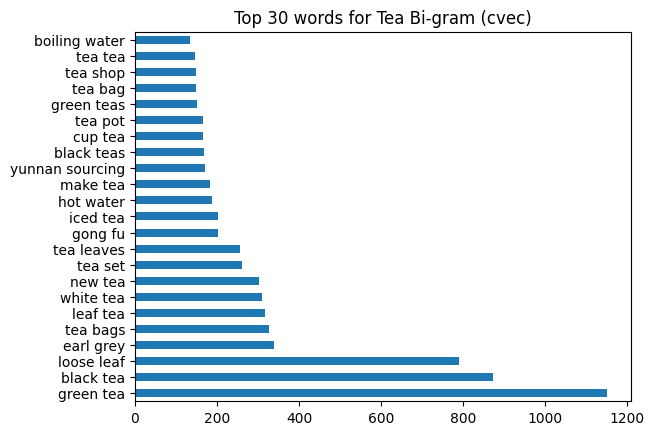

In [57]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea Bi-gram (cvec)');

#### Bi-gram
#### TF-IDF Vectorizer 

In [58]:
tvec_bi = TfidfVectorizer(stop_words = dummylist, ngram_range=(2,2), min_df=0.01)

In [59]:
X_tvec = tvec_bi.fit_transform(tea_title)

In [60]:
X_df = pd.DataFrame(X_tvec.todense(), columns=tvec_bi.get_feature_names())
print(X_df.shape)
X_df.head()

(11673, 23)


,black tea,black teas,boiling water,cup tea,earl grey,gong fu,green tea,green teas,hot water,iced tea,...,new tea,tea bag,tea bags,tea leaves,tea pot,tea set,tea shop,tea tea,white tea,yunnan sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X_df.sum().sort_values(ascending=False)[:30]

green tea          595.999628
black tea          474.631255
loose leaf         401.359388
new tea            238.951612
earl grey          207.258728
tea set            202.827396
tea bags           183.579462
white tea          176.870744
leaf tea           163.181318
tea leaves         143.328466
gong fu            135.559898
make tea           131.336898
yunnan sourcing    123.017132
tea pot            118.784596
cup tea            116.195682
iced tea           115.766074
tea shop           112.753352
hot water          112.606405
tea tea            103.501267
black teas         102.008168
green teas          92.010287
tea bag             91.518649
boiling water       81.934777
dtype: float64

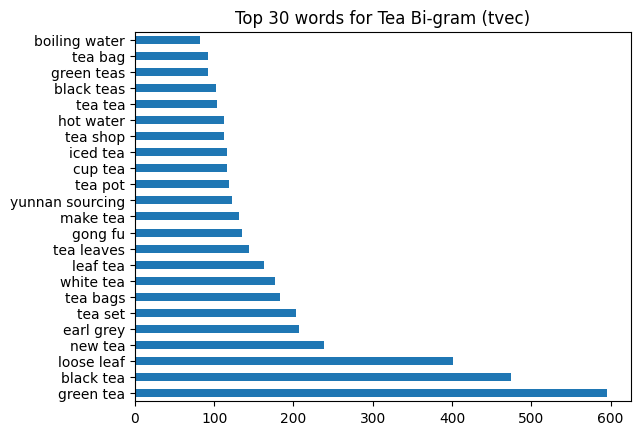

In [62]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea Bi-gram (tvec)');

#### Tri-gram
#### CountVectorizer

In [63]:
cvec_tri = CountVectorizer(stop_words=dummylist, ngram_range=(3,3), max_features=100) # filter out words that appear in less than 1% of the documents

In [64]:
X_vec = cvec_tri.fit_transform(tea_title)

In [65]:
X_vec

<11673x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1868 stored elements in Compressed Sparse Row format>

In [66]:
X_df = pd.DataFrame(X_vec.todense(), columns=cvec_tri.get_feature_names())
print(X_df.shape)
X_df.head()

(11673, 100)


,aged white tea,anji bai cha,bags loose leaf,bai mu dan,best place buy,best way make,bi luo chun,black green tea,black tea also,black tea green,...,tea tea bags,tea view poll,tea white tea,tea yunnan sourcing,tie guan yin,want get tea,want make sure,way make tea,white tea cake,wild tree purple
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X_df.sum().sort_values(ascending=False)[:30]

loose leaf tea           291
loose leaf teas           69
tie guan yin              53
japanese green tea        49
earl grey tea             46
english breakfast tea     38
jasmine green tea         34
cold brew tea             33
tea green tea             31
tea black tea             31
da hong pao               31
local tea shop            30
gong fu style             29
gong fu brewing           29
electric tea kettle       27
please let know           26
quality loose leaf        25
different types tea       24
buy loose leaf            24
bi luo chun               23
jin jun mei               23
loose leaf black          23
japanese green teas       21
tea earl grey             21
new tea set               20
loose leaf green          20
cast iron tea             20
gong fu tea               20
butterfly pea flower      20
kung fu tea               19
dtype: int64

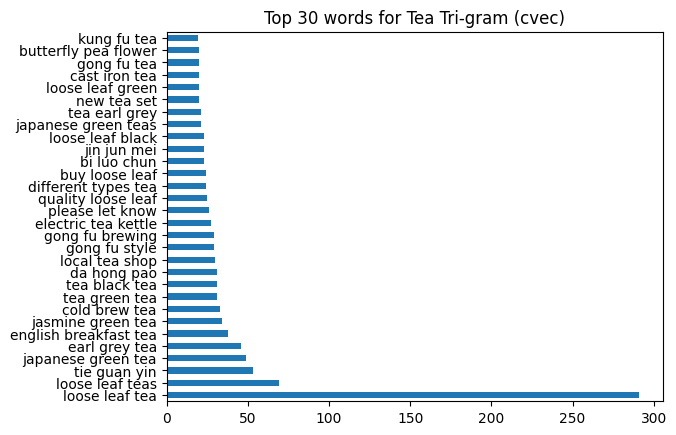

In [68]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea Tri-gram (cvec)');

#### Tri-gram
#### TF-IDF Vectorizer 

In [69]:
tvec_tri = TfidfVectorizer(stop_words=dummylist, ngram_range=(3,3), max_features=100)

In [70]:
X_tvec = tvec_tri.fit_transform(tea_title)

In [71]:
X_df = pd.DataFrame(X_tvec.todense(), columns=tvec_tri.get_feature_names())
print(X_df.shape)
X_df.head()

(11673, 100)


,aged white tea,anji bai cha,bags loose leaf,bai mu dan,best place buy,best way make,bi luo chun,black green tea,black tea also,black tea green,...,tea tea bags,tea view poll,tea white tea,tea yunnan sourcing,tie guan yin,want get tea,want make sure,way make tea,white tea cake,wild tree purple
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X_df.sum().sort_values(ascending=False)[:30]

loose leaf tea           197.356407
loose leaf teas           52.326044
tie guan yin              37.595404
earl grey tea             37.432749
japanese green tea        34.682656
english breakfast tea     32.522730
local tea shop            26.468329
cold brew tea             25.722147
jasmine green tea         24.108563
tea green tea             23.706321
please let know           23.390765
gong fu style             23.002994
gong fu brewing           22.907388
tea black tea             20.704332
different types tea       20.584775
new tea set               19.684336
da hong pao               19.522646
electric tea kettle       18.721648
tea view poll             18.000000
quality loose leaf        16.761758
tea advent calendar       16.725060
buy loose leaf            16.683399
tea earl grey             16.421449
bi luo chun               16.342596
cannot seem find          16.223893
japanese green teas       16.078876
help identifying tea      15.848968
need help finding         15

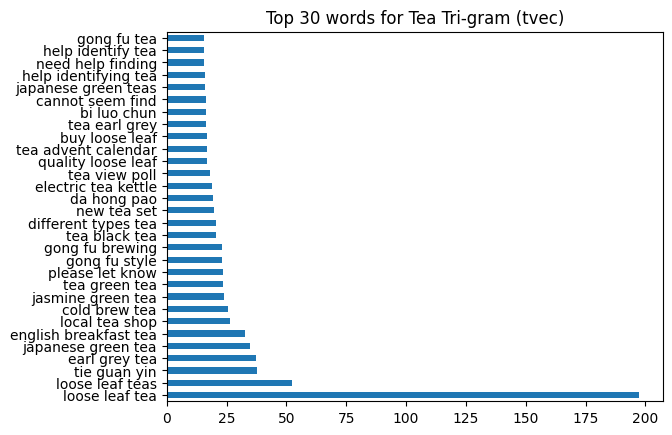

In [73]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea Tri-gram (tvec)');

### Coffee

#### CountVectorizer

In [74]:
coffee_title = df_combined.loc[df_combined['subreddit'] == 'Coffee', ['title']]['title']

In [75]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words=dummylist, min_df=0.01) # filter out words that appear in less than 1% of the documents

In [76]:
X_vec = cvec.fit_transform(coffee_title)

In [77]:
X_df = pd.DataFrame(X_vec.toarray(), columns=cvec.get_feature_names())
print(X_df.shape)
X_df.head()

(13253, 569)


,10,100,12,15,1zpresso,20,30,50,able,absolutely,...,works,world,worth,wrong,x200b,year,years,yesterday,yet,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X_df.sum().sort_values(ascending=False)[:30]

coffee       22156
grinder       3889
espresso      3527
get           3323
machine       3244
water         3230
beans         3207
brew          2810
one           2774
make          2654
cup           2545
use           2514
know          2477
grind         2420
time          2280
really        2133
looking       2006
using         1997
much          1965
want          1929
also          1860
taste         1844
new           1843
something     1728
best          1600
tried         1497
help          1494
pour          1474
could         1466
got           1466
dtype: int64

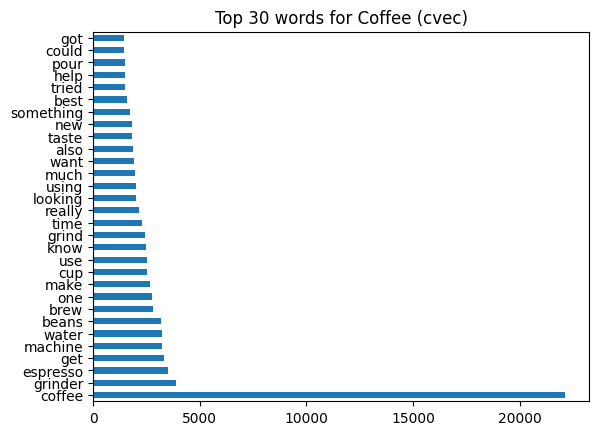

In [79]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee (cvec)');

#### TF-IDF Vectorizer 

In [80]:
tvec = TfidfVectorizer(stop_words = dummylist, min_df=0.01)

In [81]:
X_tvec = tvec.fit_transform(coffee_title)

In [82]:
X_df = pd.DataFrame(X_tvec.todense(), columns=tvec.get_feature_names())
print(X_df.shape)
X_df.head()

(13253, 569)


,10,100,12,15,1zpresso,20,30,50,able,absolutely,...,works,world,worth,wrong,x200b,year,years,yesterday,yet,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.205309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X_df.sum().sort_values(ascending=False)[:30]

coffee       1659.613595
grinder       423.343703
espresso      408.488113
machine       385.988960
beans         364.892066
get           336.390807
brew          320.238890
water         317.865593
cup           306.081589
one           305.899136
make          305.622319
know          299.885433
use           278.117746
best          272.803502
looking       267.489821
new           266.319326
grind         253.911855
time          252.076379
want          229.994774
really        225.844818
taste         221.466022
much          219.570810
cold          218.206905
using         214.892285
help          213.164035
milk          204.733631
something     202.512901
morning       202.297561
pot           197.463184
pour          193.837226
dtype: float64

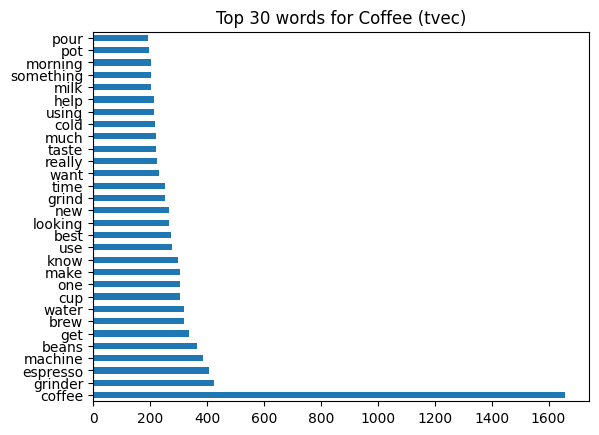

In [84]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee (tvec)');

#### Bi-gram
#### CountVectorizer

In [85]:
cvec_bi = CountVectorizer(stop_words=dummylist, ngram_range=(2,2), min_df=0.01) # filter out words that appear in less than 1% of the documents

In [86]:
X_vec = cvec_bi.fit_transform(coffee_title)

In [87]:
X_df = pd.DataFrame(X_vec.todense(), columns=cvec_bi.get_feature_names())
print(X_df.shape)
X_df.head()

(13253, 45)


,baratza encore,best coffee,black coffee,brew coffee,burr grinder,coffee beans,coffee coffee,coffee grinder,coffee grounds,coffee machine,...,love coffee,make coffee,making coffee,medium roast,moka pot,much coffee,need help,new coffee,specialty coffee,timemore c2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_df.sum().sort_values(ascending=False)[:30]

french press        1137
cold brew           1020
moka pot             797
espresso machine     738
coffee maker         637
coffee machine       585
coffee beans         519
cup coffee           494
grind size           433
coffee shop          422
ground coffee        379
make coffee          368
hand grinder         343
drip coffee          339
burr grinder         324
iced coffee          317
coffee grinder       310
new coffee           274
instant coffee       266
black coffee         260
baratza encore       258
dark roast           242
coffee shops         240
filter coffee        224
hot water            220
specialty coffee     219
making coffee        206
fellow ode           194
grind setting        190
light roast          190
dtype: int64

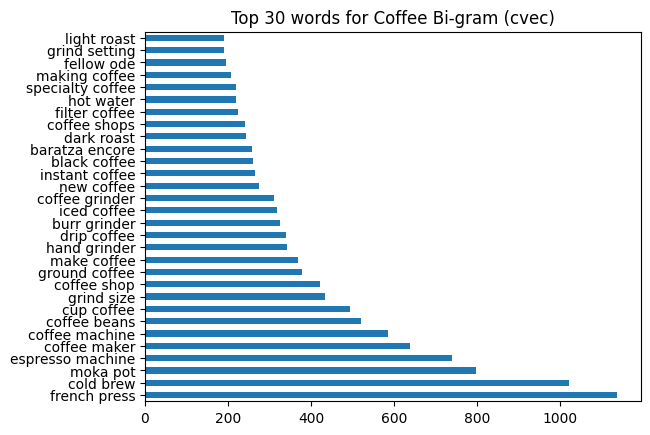

In [89]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee Bi-gram (cvec)');

#### Bi-gram
#### TF-IDF Vectorizer 

In [90]:
tvec_bi = TfidfVectorizer(stop_words = dummylist, ngram_range=(2,2), min_df=0.01)

In [91]:
X_tvec = tvec_bi.fit_transform(coffee_title)

In [92]:
X_df = pd.DataFrame(X_tvec.todense(), columns=tvec_bi.get_feature_names())
print(X_df.shape)
X_df.head()

(13253, 45)


,baratza encore,best coffee,black coffee,brew coffee,burr grinder,coffee beans,coffee coffee,coffee grinder,coffee grounds,coffee machine,...,love coffee,make coffee,making coffee,medium roast,moka pot,much coffee,need help,new coffee,specialty coffee,timemore c2
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.777941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_df.sum().sort_values(ascending=False)[:30]

french press        514.974145
cold brew           426.406775
espresso machine    416.595091
moka pot            377.164772
coffee machine      320.626665
coffee beans        315.491091
coffee maker        295.775219
cup coffee          290.278047
coffee shop         249.343544
grind size          231.817416
make coffee         214.757520
hand grinder        200.212676
ground coffee       195.288557
burr grinder        184.269371
coffee grinder      183.237674
new coffee          171.734405
drip coffee         168.691776
baratza encore      168.161240
black coffee        159.546071
iced coffee         154.655683
instant coffee      151.236836
dark roast          143.783345
coffee shops        141.844112
specialty coffee    135.628019
love coffee         132.705785
making coffee       130.282566
hot water           125.069033
fellow ode          117.405735
light roast         116.365177
grind setting       115.939291
dtype: float64

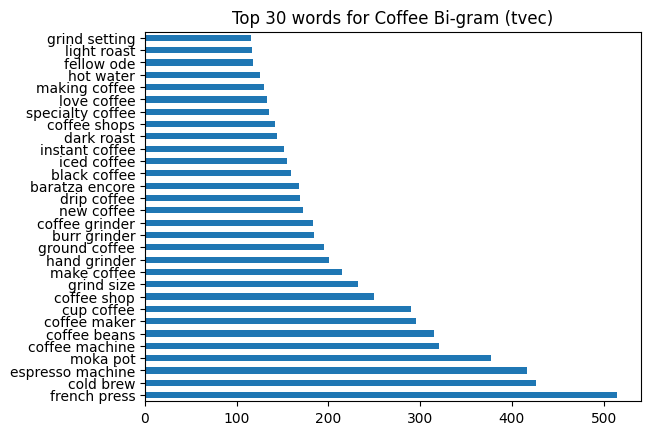

In [94]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee Bi-gram (tvec)');

#### Tri-gram
#### CountVectorizer

In [95]:
cvec_tri = CountVectorizer(stop_words=dummylist, ngram_range=(3,3), max_features=100) # filter out words that appear in less than 1% of the documents

In [96]:
X_vec = cvec_tri.fit_transform(coffee_title)

In [97]:
X_df = pd.DataFrame(X_vec.todense(), columns=cvec_tri.get_feature_names())
print(X_df.shape)
X_df.head()

(13253, 100)


,1zpresso jx pro,aeropress french press,automatic coffee machine,baratza encore grinder,beans local roaster,best coffee ever,best way make,bialetti moka pot,breville bambino plus,breville barista express,...,third wave water,timemore c2 grinder,timemore chestnut c2,use french press,use moka pot,using french press,using moka pot,want make sure,way make coffee,whole bean coffee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X_df.sum().sort_values(ascending=False)[:30]

drip coffee maker            95
breville barista express     77
cold brew coffee             67
french press coffee          65
make cold brew               64
please let know              58
gaggia classic pro           58
local coffee shop            57
breville precision brewer    54
smart grinder pro            54
use french press             51
coffee french press          50
moka pot coffee              43
making cold brew             43
drip coffee machine          42
breville smart grinder       41
cold brew concentrate        39
using french press           39
third wave water             37
1zpresso jx pro              35
fellow stagg ekg             34
aeropress french press       33
long story short             33
new coffee maker             33
using moka pot               33
whole bean coffee            33
coffee every morning         33
nitro cold brew              32
breville barista pro         30
timemore chestnut c2         30
dtype: int64

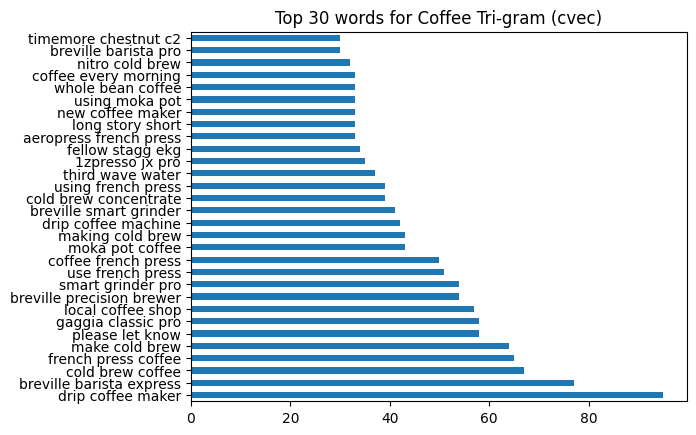

In [99]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee Tri-gram (cvec)');

#### Tri-gram
#### TF-IDF Vectorizer 

In [100]:
tvec_tri = TfidfVectorizer(stop_words = dummylist, ngram_range=(3,3), max_features=100)

In [101]:
X_tvec = tvec_tri.fit_transform(coffee_title)

In [102]:
X_df = pd.DataFrame(X_tvec.todense(), columns=tvec_tri.get_feature_names())
print(X_df.shape)
X_df.head()

(13253, 100)


,1zpresso jx pro,aeropress french press,automatic coffee machine,baratza encore grinder,beans local roaster,best coffee ever,best way make,bialetti moka pot,breville bambino plus,breville barista express,...,third wave water,timemore c2 grinder,timemore chestnut c2,use french press,use moka pot,using french press,using moka pot,want make sure,way make coffee,whole bean coffee
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_df.sum().sort_values(ascending=False)[:30]

drip coffee maker            68.108078
breville barista express     61.220532
local coffee shop            49.928285
please let know              48.990606
french press coffee          48.303362
gaggia classic pro           46.813387
cold brew coffee             44.662360
make cold brew               44.139996
use french press             42.335009
coffee french press          39.600223
breville precision brewer    36.695547
making cold brew             36.470254
drip coffee machine          34.813099
smart grinder pro            34.095042
using french press           34.072713
long story short             30.431411
moka pot coffee              29.591585
using moka pot               28.779373
fellow stagg ekg             28.360613
breville smart grinder       28.019565
whole bean coffee            27.948634
cold brew concentrate        27.180646
new coffee maker             26.995312
coffee every morning         26.713814
aeropress french press       26.493091
one cup coffee           

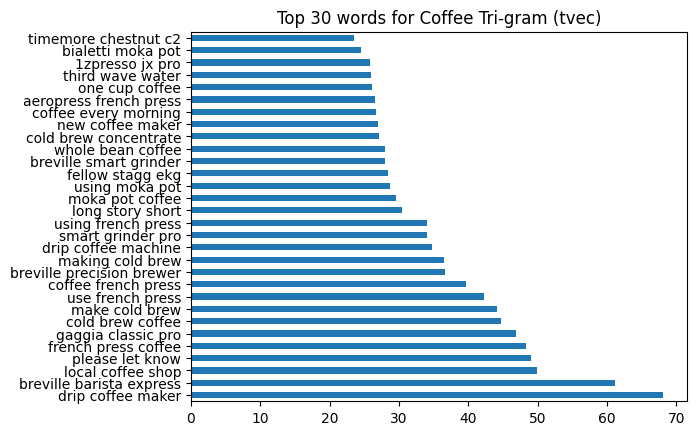

In [104]:
X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee Tri-gram (tvec)');

### Findings 

The words identified between similar n-gram of CountVectorizer and TF-IDF Vectorizer are mostly the same. Unigram words are not as useful in this case for identifying topics of interest. Taking a closer look at bigram and trigram, we can find words that relate to flavour, methods of making. These words would form the basis of running a sentiment analysis on afterwards. 

**Tea**

Trigram: 
- loose leaf tea
- earl grey tea
- tie guan yin
- gong fu style
- gong fu tea
- english breakfast tea

Bigram: 
- green tea
- black tea
- white tea

**Coffee**

Trigram: 
- breville barista express
- french press coffee
- cold brew coffee

Bigram: 
- moka pot
- hand grinder
- burr grinder

Sample list of words here are not exhaustive (refer to tables above) 

## Tokenize

In [105]:
# Instantiate tokenizer.
# This removes emojis as well
tokenizer_1 = RegexpTokenizer(r'\w+')

In [106]:
df_combined['tokenized']=df_combined['title'].apply(lambda x: tokenizer_1.tokenize(x)) 

In [107]:
df_combined.head()

,subreddit,title,tokenized
0,tea,can someone recommend a tea for me my lovely w...,"[can, someone, recommend, a, tea, for, me, my,..."
1,tea,buying chamomile in us i took a look at the ve...,"[buying, chamomile, in, us, i, took, a, look, ..."
2,tea,is this a good introduction to kamairicha,"[is, this, a, good, introduction, to, kamairicha]"
3,tea,i was curious about the story on colombian bla...,"[i, was, curious, about, the, story, on, colom..."
4,tea,haul any suggestions on how to brew these teas,"[haul, any, suggestions, on, how, to, brew, th..."


## Define stopwords

In [108]:
sw = stopwords.words("english")

In [109]:
# stopwords now include key labels such as 'tea' and 'coffee' so that the model is not exposed to these words that easily help to predict the posts
custom_sw = ['tea', 'teas', 'coffee'] 
sw.extend(custom_sw)

In [110]:
sw[-10:]

["wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'tea',
 'teas',
 'coffee']

## Drop stopwords and customized words

In [111]:
df_combined['tokenized']=df_combined['tokenized'].apply(lambda x: [word for word in x if word not in sw]) 

## Lemmatizing

In [112]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

In [113]:
df_combined['lemmatized']=df_combined['tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_combined.head()

,subreddit,title,tokenized,lemmatized
0,tea,can someone recommend a tea for me my lovely w...,"[someone, recommend, lovely, wife, drinking, s...","[someone, recommend, lovely, wife, drinking, s..."
1,tea,buying chamomile in us i took a look at the ve...,"[buying, chamomile, us, took, look, vendors, l...","[buying, chamomile, u, took, look, vendor, lis..."
2,tea,is this a good introduction to kamairicha,"[good, introduction, kamairicha]","[good, introduction, kamairicha]"
3,tea,i was curious about the story on colombian bla...,"[curious, story, colombian, black, found, answ...","[curious, story, colombian, black, found, answ..."
4,tea,haul any suggestions on how to brew these teas,"[haul, suggestions, brew]","[haul, suggestion, brew]"


In [114]:
df_combined['lemmatized_title']=df_combined['lemmatized'].apply(lambda x: " ".join(x) )

In [115]:
# notice there are still some posts that include words such as teacoffee (which is a place/shop) 
df_combined.loc[df_combined['lemmatized_title'].str.contains('coffee'), :]

,subreddit,title,tokenized,lemmatized,lemmatized_title
57,tea,tea info resources so i have a job at a teacof...,"[info, resources, job, teacoffee, place, hosti...","[info, resource, job, teacoffee, place, hostin...",info resource job teacoffee place hosting smal...
89,tea,morning tea recommendations i’m a current proc...,"[morning, recommendations, current, procoffee,...","[morning, recommendation, current, procoffee, ...",morning recommendation current procoffee antit...
111,tea,tea recap for the week of september 19 septem...,"[recap, week, september, 19, september, 25, mo...","[recap, week, september, 19, september, 25, mo...",recap week september 19 september 25 monday se...
664,tea,tried something new today teacoffeemilkbrown s...,"[tried, something, new, today, teacoffeemilkbr...","[tried, something, new, today, teacoffeemilkbr...",tried something new today teacoffeemilkbrown s...
932,tea,tea to have with sweet treats hello\n\nlooking...,"[sweet, treats, hello, looking, recommendation...","[sweet, treat, hello, looking, recommendation,...",sweet treat hello looking recommendation anyon...
...,...,...,...,...,...
24872,Coffee,i love coffee but i never like the coffee i ma...,"[love, never, like, make, home, looking, advic...","[love, never, like, make, home, looking, advic...",love never like make home looking advice tried...
24878,Coffee,what coffee did you grow up with thinking it w...,"[grow, thinking, normal, discovering, folgers,...","[grow, thinking, normal, discovering, folgers,...",grow thinking normal discovering folgers grand...
24881,Coffee,what is wrong with my coffee if anything here ...,"[wrong, anything, current, setup, using, cheme...","[wrong, anything, current, setup, using, cheme...",wrong anything current setup using chemex blea...
24883,Coffee,different grind size ratios are there any “sta...,"[different, grind, size, ratios, standards, pr...","[different, grind, size, ratio, standard, prec...",different grind size ratio standard precise gr...


## Stemming

In [116]:
# Instantiate PorterStemmer.
p_stemmer = PorterStemmer()

In [117]:
df_combined['stemmed']=df_combined['tokenized'].apply(lambda x: [p_stemmer.stem(word) for word in x])

In [118]:
df_combined['stemmed_title']=df_combined['stemmed'].apply(lambda x: " ".join(x) )

In [119]:
df_combined.head()

,subreddit,title,tokenized,lemmatized,lemmatized_title,stemmed,stemmed_title
0,tea,can someone recommend a tea for me my lovely w...,"[someone, recommend, lovely, wife, drinking, s...","[someone, recommend, lovely, wife, drinking, s...",someone recommend lovely wife drinking sloane ...,"[someon, recommend, love, wife, drink, sloan, ...",someon recommend love wife drink sloan heavenl...
1,tea,buying chamomile in us i took a look at the ve...,"[buying, chamomile, us, took, look, vendors, l...","[buying, chamomile, u, took, look, vendor, lis...",buying chamomile u took look vendor list none ...,"[buy, chamomil, us, took, look, vendor, list, ...",buy chamomil us took look vendor list none cha...
2,tea,is this a good introduction to kamairicha,"[good, introduction, kamairicha]","[good, introduction, kamairicha]",good introduction kamairicha,"[good, introduct, kamairicha]",good introduct kamairicha
3,tea,i was curious about the story on colombian bla...,"[curious, story, colombian, black, found, answ...","[curious, story, colombian, black, found, answ...",curious story colombian black found answer alt...,"[curiou, stori, colombian, black, found, answe...",curiou stori colombian black found answer alth...
4,tea,haul any suggestions on how to brew these teas,"[haul, suggestions, brew]","[haul, suggestion, brew]",haul suggestion brew,"[haul, suggest, brew]",haul suggest brew


<a id="Compare"></a>
## Compare Lemmatization and Stemming

In [120]:
# Instantiate a CountVectorizer
lem_cvec = CountVectorizer(stop_words=sw)

In [121]:
# lem_X_df = pd.DataFrame((lem_cvec.fit_transform(df_combined.loc[df_combined['subreddit']=='tea','lemmatized_title'])).toarray(), columns=lem_cvec.get_feature_names_out())
# print(lem_X_df.shape)
# lem_X_df.head()

In [122]:
lem_X_df = pd.DataFrame((lem_cvec.fit_transform(df_combined['lemmatized_title'])).toarray(), columns=lem_cvec.get_feature_names())
print(lem_X_df.shape)
lem_X_df.head()

(24926, 33364)


,00,000,001,00100000,001g,0024g,005,005mm,008,01,...,鹤峰县,틱톡,ﬁlter,𝐀𝐑𝐄𝐍𝐓,𝐅𝐀𝐌𝐈𝐋𝐘,𝐅𝐑𝐈𝐄𝐍𝐃𝐒,𝐑𝐄𝐀𝐋𝐋𝐘,𝐒𝐎𝐌𝐄,𝐓𝐇𝐄𝐘𝐑𝐄,𝔗𝔥𝔢
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Instantiate a CountVectorizer
stem_cvec = CountVectorizer(stop_words=sw)

In [124]:
stem_X_df = pd.DataFrame(stem_cvec.fit_transform(df_combined['stemmed_title']).toarray(), columns=stem_cvec.get_feature_names())
print(stem_X_df.shape)
stem_X_df.head()

(24926, 27500)


,00,000,001,00100000,001g,0024g,005,005mm,008,01,...,鹤峰县,틱톡,ﬁlter,𝐀𝐑𝐄𝐍𝐓,𝐅𝐀𝐌𝐈𝐋𝐘,𝐅𝐑𝐈𝐄𝐍𝐃𝐒,𝐑𝐄𝐀𝐋𝐋𝐘,𝐒𝐎𝐌𝐄,𝐓𝐇𝐄𝐘𝐑𝐄,𝔗𝔥𝔢
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Stemming returns less columns as expected, at 27k compared to lemming at 33k. We will proceed with stemming as it is more robust and reduces the numbers of features. 

# Prepare data for export

In [125]:
df_combined['subreddit']=df_combined['subreddit'].map({'tea':'1', 'Coffee':'0'})

In [126]:
df_export=df_combined[['subreddit','title','stemmed_title']]
df_export

,subreddit,title,stemmed_title
0,1,can someone recommend a tea for me my lovely w...,someon recommend love wife drink sloan heavenl...
1,1,buying chamomile in us i took a look at the ve...,buy chamomil us took look vendor list none cha...
2,1,is this a good introduction to kamairicha,good introduct kamairicha
3,1,i was curious about the story on colombian bla...,curiou stori colombian black found answer alth...
4,1,haul any suggestions on how to brew these teas,haul suggest brew
...,...,...,...
24921,0,is store brand cold brew less acidic,store brand cold brew less acid
24922,0,on yunnan coffee i was drinking a mix of yunna...,yunnan drink mix yunnan guatemala cafe morn sp...
24923,0,what is an easy way to get strong noteless cof...,easi way get strong noteless hello drank nesca...
24924,0,how to make coffee less bitter hi i have been ...,make less bitter hi drink instant find extrem ...


In [135]:
df_export.to_csv('data/df_export.csv',index=False) 

# Additional code for checking of words after stemming
However, this did not return any more unique words or topics of interest than previously identified. 

#### Coffee
#### TF-IDF Vectorizer 

In [137]:
sw.extend(dummy_sw)

In [138]:
sw[-30:]

['won',
 "won't",
 'wouldn',
 "wouldn't",
 'tea',
 'teas',
 'coffee',
 'im',
 'ive',
 'good',
 'dont',
 'does',
 'question',
 'maybe',
 'did',
 'doesnt',
 'hi',
 'people',
 'id',
 'recently',
 'thanks',
 'like',
 'day',
 'nice',
 'thank',
 'anyone',
 'first',
 'would',
 'drinking',
 'drink']

In [139]:
stem_tvec = TfidfVectorizer(stop_words = sw)

In [140]:
coffee_stem_X_df = pd.DataFrame(stem_tvec.fit_transform(df_combined.loc[df_combined['subreddit']=='0','lemmatized_title']).toarray(), columns=stem_tvec.get_feature_names_out())
print(coffee_stem_X_df.shape)
coffee_stem_X_df.head()

(13253, 24823)


,00,000,001,00100000,001g,0024g,005,005mm,01,010,...,摩卡壺拉花,틱톡,ﬁlter,𝐀𝐑𝐄𝐍𝐓,𝐅𝐀𝐌𝐈𝐋𝐘,𝐅𝐑𝐈𝐄𝐍𝐃𝐒,𝐑𝐄𝐀𝐋𝐋𝐘,𝐒𝐎𝐌𝐄,𝐓𝐇𝐄𝐘𝐑𝐄,𝔗𝔥𝔢
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
coffee_stem_X_df.sum().sort_values(ascending=False)[:30]

grinder     305.720053
machine     285.306408
bean        272.274646
espresso    269.665409
cup         236.280596
make        230.771632
brew        222.656848
get         217.309705
one         202.942984
water       201.914767
grind       190.459029
know        190.101699
time        182.452632
taste       181.171183
use         180.714930
best        177.299306
new         170.070446
looking     169.449517
want        154.818312
cold        149.941098
really      145.878196
filter      142.257121
much        142.117460
using       141.006657
pot         139.713583
help        138.581820
morning     137.138629
ground      135.645059
press       135.028137
roast       133.600465
dtype: float64

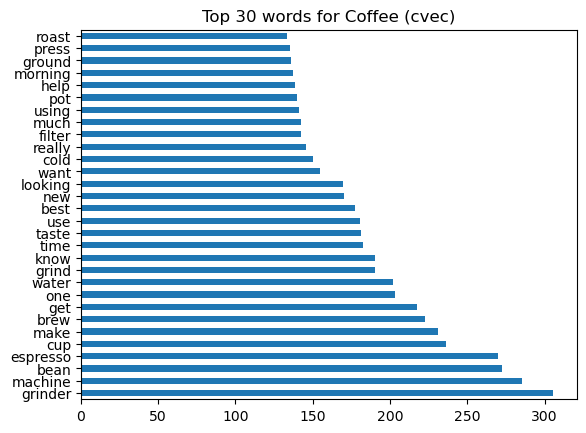

In [142]:
coffee_stem_X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee (cvec)');

#### Coffee Bi-gram
#### TF-IDF Vectorizer 

In [143]:
stem_tvec_bi = TfidfVectorizer(stop_words = sw, ngram_range=(2,2), min_df=0.001)

In [144]:
# # Instantiate a CountVectorizer
# stem_cvec = CountVectorizer(stop_words=sw)

In [145]:
coffee_stem_X_df = pd.DataFrame(stem_tvec_bi.fit_transform(df_combined.loc[df_combined['subreddit']=='0','lemmatized_title']).toarray(), columns=stem_tvec_bi.get_feature_names_out())
print(coffee_stem_X_df.shape)
coffee_stem_X_df.head()

(13253, 24)


,baratza encore,burr grinder,cold brew,dark roast,drip machine,espresso machine,every morning,every time,fellow ode,french press,...,james hoffman,let know,light roast,local roaster,medium roast,moka pot,need help,timemore c2,whole bean,year ago
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
coffee_stem_X_df.sum().sort_values(ascending=False)[:30]

french press        594.595091
espresso machine    519.855325
cold brew           490.236767
moka pot            415.778608
grind size          274.534434
hand grinder        238.517281
burr grinder        233.420180
dark roast          178.264968
baratza encore      175.999195
light roast         173.159690
grind setting       172.443075
hot water           143.382157
medium roast        143.124434
whole bean          134.113782
year ago            131.510556
fellow ode          124.747856
need help           121.777760
let know            120.860951
local roaster       120.801085
every morning       119.794508
every time          119.361428
drip machine        115.054096
timemore c2         112.925373
james hoffman       101.978797
dtype: float64

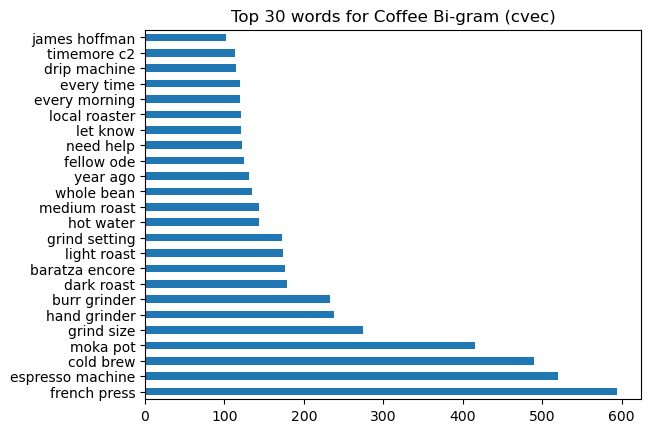

In [147]:
coffee_stem_X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Coffee Bi-gram (cvec)');

#### Tea
#### TF-IDF Vectorizer 

In [148]:
stem_tvec = TfidfVectorizer(stop_words = sw)

In [149]:
tea_stem_X_df = pd.DataFrame(stem_tvec.fit_transform(df_combined.loc[df_combined['subreddit']=='1','lemmatized_title']).toarray(), columns=stem_tvec.get_feature_names_out())
print(tea_stem_X_df.shape)
tea_stem_X_df.head()

(11673, 17952)


,000,008,01,010,011,012,013,013g,014,015g,...,通通进冰箱吧,邹丙良,鄂西茶叶分布及生产概况,金桔普洱,金萱,铁观音,青芯大冇,香片,高山茶,鹤峰县
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
tea_stem_X_df.sum().sort_values(ascending=False)[:30]

green             187.838206
new               179.351149
leaf              177.931564
cup               170.504709
know              169.033197
one               153.850009
teapot            150.544177
time              150.170393
black             145.863305
get               140.954127
oolong            138.228236
help              133.697323
make              128.379833
looking           127.507450
love              124.737624
got               123.704574
matcha            123.651220
taste             122.599618
set               122.024996
water             119.727440
really            114.930668
recommendation    113.074867
loose             112.876948
best              110.881562
want              108.165062
favorite          107.345253
find              103.995049
brew              103.004404
morning           101.967109
pot                98.192189
dtype: float64

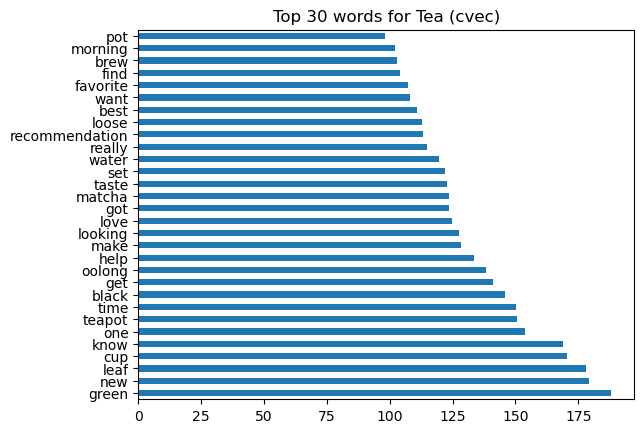

In [151]:
tea_stem_X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea (cvec)');

#### Tea Bi-gram
#### TF-IDF Vectorizer 

In [152]:
stem_tvec_bi = TfidfVectorizer(stop_words = sw, ngram_range=(2,2), min_df=0.001)

In [153]:
tea_stem_X_df = pd.DataFrame(stem_tvec_bi.fit_transform(df_combined.loc[df_combined['subreddit']=='1','lemmatized_title']).toarray(), columns=stem_tvec_bi.get_feature_names_out())
print(tea_stem_X_df.shape)
tea_stem_X_df.head()

(11673, 7)


,boiling water,earl grey,gong fu,hot water,loose leaf,year ago,yunnan sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
tea_stem_X_df.sum().sort_values(ascending=False)[:30]

loose leaf         578.255091
earl grey          235.399912
gong fu            148.020194
yunnan sourcing    141.467408
hot water          137.389903
year ago           115.891378
boiling water      105.119539
dtype: float64

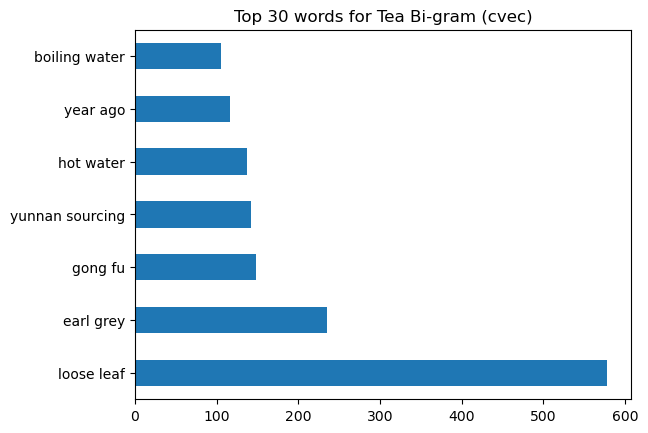

In [155]:
tea_stem_X_df.sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Top 30 words for Tea Bi-gram (cvec)');

<a id="Summary2"></a>
# Summary

**EDA**

There were multiple duplicated rows within the dataset of both tea and coffee and had to be dropped. There were also multiple posts by 'AutoModerator' present which as the name suggests, is by Reddit automoderator. We also removed posts where 'removed_by_category' is not NaN as these posts have been filtered out automatically by Reddit. Subsequently, 'selftext' which is the description of the Reddit post is combined with the 'title' so that we have a more comprehensive title. 

Basic cleaning of data was done before trying to identify the top words of relevance - such as lowercase, removing html links. 

To identify the top words or interesting words, CountVectorizer and TF-IDF Vectorizer were used for unigram, bigram and trigram. This process has been repeated a few times to filter out the words which are not stopwords but of little use in helping us identify the interesting words. Key labels such as 'tea' and 'coffee' were deliberately left in as they hold meaning in identifying the type of unique tea or coffee or other words of interest. 

Bigram and trigram returned interesting results that gave better insight to the popular topics discussed by the public. These words can then carry on into sentiment analysis in Part 4. Taking a closer look at bigram and trigram, we can find words that relate to flavour, methods of making. These words would form the basis of running a sentiment analysis on afterwards. 

**Data Cleaning**

Subsequently, we then proceeded with using the combined 'title' and 'subreddit' for our analysis. We now dropped stopwords, now including key labels suchs as 'tea' and 'coffee' and other customized words as we prepare the data for exportation for modelling. Having an excess of key labels would result in the model easily identifying which classification of the posts it belongs too. Lemmatization and Stemming were applied and compared with one another. As expected, Stemming returns fewer number of features and will be used over lemmatization. 